<a href="https://colab.research.google.com/github/a-afonso/03MAIR-Algoritmos-de-optimizacion/blob/master/Utilidades/Seminario_Problema_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4
3


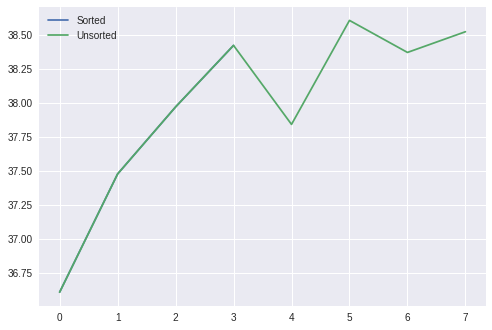

[[33.392637540480436,
  35.84930239932895,
  39.141892782256306,
  38.04615240769872,
  36.607496282441105,
  1.4386561252576158],
 [34.727207017932066,
  37.29846550593291,
  39.83841424639937,
  38.04615240769872,
  37.477559794490766,
  0.5685926132079544],
 [34.7982973414534,
  38.333409921071215,
  40.706151270175795,
  38.04615240769872,
  37.97100273509978,
  0.07514967259893979],
 [35.781216927216725,
  38.91621959430804,
  40.95284267694416,
  38.04615240769872,
  38.42410790154191,
  0.3779554938431886],
 [35.84930239932895,
  39.141892782256306,
  38.333409921071215,
  38.04615240769872,
  37.8426893775888,
  0.20346303010992273],
 [40.706151270175795,
  40.95284267694416,
  34.727207017932066,
  38.04615240769872,
  38.60808834318768,
  0.561935935488961],
 [34.7982973414534,
  44.86392407658402,
  35.781216927216725,
  38.04615240769872,
  38.372397688238216,
  0.32624528053949575],
 [37.29846550593291,
  39.83841424639937,
  38.91621959430804,
  38.04615240769872,
  38.52

In [4]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# Inicialización de variables globales
nAnimals = 30
nTreats = 2
nGroups = 2

# Creación de un dataset de muestra
MUESTRA = pd.DataFrame()
MUESTRA["Id"] = [i for i in range(nAnimals)]
MUESTRA["Peso"] = [random.gauss(37, 2.1) for i in range(nAnimals)]
MUESTRA["Sexo"] = [random.getrandbits(1) for i in range(nAnimals)]

# Dividimos el dataset en dos listas, una para cada sexo
MALE = []
FEMALE = []

for index, row in MUESTRA.iterrows():
  if row["Sexo"] == 0:
    MALE.append([row["Id"], row["Peso"]])
  else:
    FEMALE.append([row["Id"], row["Peso"]])

# Calcula el número máximo de animales por grupo
nMale = len(MALE)
nFemale = len(FEMALE)

nAnimalsGroup = min(nMale, nFemale) // (nTreats * nGroups)

# Función para agrupar una lista de cualquier sexo
def group_animals(L, nTreats, nGroups, nAnimalsGroup):
  RES = []
  
  # Calcula el peso medio
  p_medio = np.mean(L, axis=0)[1]
  
  # Calcula el número total de grupos
  nTotalGroups = nTreats * nGroups
  
  # Calcula el número de animales de la lista
  nAnimalsSex = nTotalGroups * nAnimalsGroup
  
  # Ordenamos la muestra por peso
  LUNSORTED = L
  LSORTED = sorted(L, key=lambda x : x[1])
  #for x in L: print(x)
  
  print(nTotalGroups)
  print(nAnimalsGroup)
    
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LSORTED[j][1])
    G.append(p_medio)
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
      
    RES.append(G)
    
  X = []
  for x in RES: 
    X.append(x[4])
    
  for i in range(nTotalGroups):
    G = []
    for j in range(i, nAnimalsSex, nTotalGroups):
      G.append(LUNSORTED[j][1])
    G.append(p_medio)
    m = np.mean(G)
    G.append(m)
    G.append(abs(p_medio - m))
      
    RES.append(G)
  
  Y = []
  for y in RES: 
    Y.append(y[4])

  fig, axes = plt.subplots(1, 1)
  #plt.plot(X, 'r', label='linear')
  #plt.plot(Y, 'w', label='linear')
  #plt.show()
  
  # creación de la figura 
  axes.plot(np.arange(len(X)), X) 
  axes.plot(np.arange(len(Y)), Y) 
  # impresión de la figura 
  plt.legend(['Sorted', 'Unsorted'], loc='best') 
  plt.show()
  
  return RES
  
group_animals(MALE, nTreats, nGroups, nAnimalsGroup)  
  

# Creamos una lista que contendrá los individuos de cada grupo




#


